In [59]:
import numpy as np
import tensorflow as tf 
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model
from keras.layers import Input
from sklearn .model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')

In [30]:
df= pd.read_csv("./data_boston.csv", header="infer", sep=";")
X= df.drop(columns=['price'])
y= df['price']

In [6]:
X.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


In [8]:
y.head(3)

0    24.0
1    21.6
2    34.7
Name: price, dtype: float64

# PREDICCIÓN PRECIO CASAS DE BOSTON MODELO SECUENCIAL

In [32]:
# A las redes neuronales les gustan los datos normalizados o escalados. para eso utilizaremos el minmaxScal. 
# Pero solo escalaremos los valores de entrada
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
n_vars = X_train.shape[-1]
print(f"Tenemos {n_vars} variables de entrada")

Tenemos 13 variables de entrada


In [36]:
modelo = Sequential()
modelo.add(Dense(1, input_shape=(n_vars,), activation="linear"))

In [40]:
modelo.compile(optimizer="adam", loss="mae", metrics=["mse"])
modelo.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
historico = modelo.fit(X_train, y_train, epochs = 2000, batch_size=10, validation_split=0.2, verbose=0) # podemos poner verbose=0 para que no salga la barra de progreso

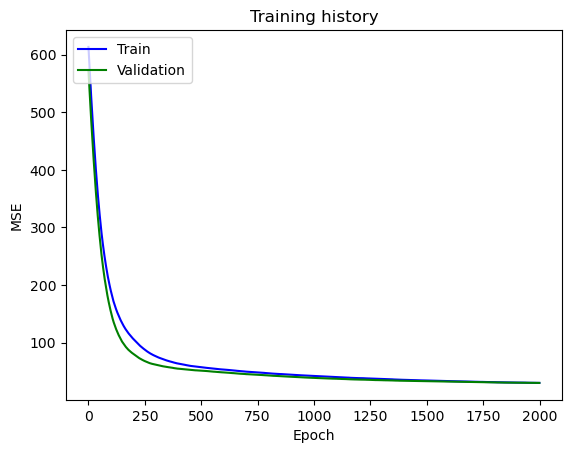

In [48]:
plt.plot(historico.history['mse'], c='b', label='Train')
plt.plot(historico.history['val_mse'], c='g', label='Validation')
plt.title('Training history')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [50]:
# Hacer predicciones y calcular el error
y_pred = modelo.predict(X_test)[:,0]  
RMSE = np.sqrt(np.mean((y_test-y_pred)**2))
np.round(RMSE, 3)
print(f'Error (RMSE): {RMSE:.4f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Error (RMSE): 5.3645


In [54]:
MSE = modelo.evaluate(X_test, y_test)
print(MSE)
print(np.sqrt(MSE))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0297 - mse: 22.7251 
[3.4141652584075928, 28.77763557434082]
[1.84774599 5.36447906]


# PREDICCIÓN PRECIO CASAS DE BOSTON MODELO FUNCIONAL

In [61]:
entrada = Input(shape=(n_vars,))
salida = Dense(1)(entrada)

modelo = Model(inputs=entrada, outputs=salida)

modelo.compile(
   optimizer="adam", 
   loss="mse",  # Error cuadrático medio
   metrics=["mae"]  # Error absoluto medio
)

modelo.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
historico = modelo.fit(X_train, y_train, epochs = 200, batch_size=10, validation_split=0.2, verbose=0) # podemos poner verbose=0 para que no salga la barra de progreso

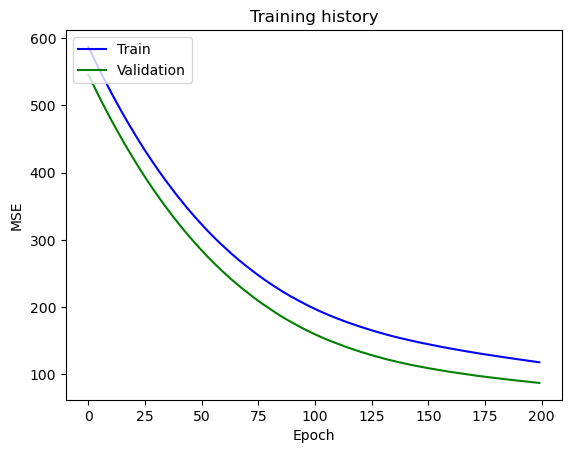

In [71]:
plt.plot(historico.history['loss'], c='b', label='Train')  # Cambiado 'mse' por 'loss'
plt.plot(historico.history['val_loss'], c='g', label='Validation')  # Cambiado 'val_mse' por 'val_loss'
plt.title('Training history')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Callback de terminación temprana

In [73]:
# Callback de terminación temprana -> Callback function for early stopping
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, Flatten

class myCallback(tf.keras.callbacks.Callback):
    # Se lanza al final de cada etapa
    def on_epoch_end(self, epoch, logs={}): # logs permite acceder a parámetros de la red neuronal
        if(logs.get('accuracy')>0.95):
            print('\He alcanzado el 95% accuracy así que cancela el entrenamiento!')
            self.model.stop_training = True

In [75]:
callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [77]:
# Create the model
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer="adam", 
             loss="sparse_categorical_crossentropy", 
             metrics=["accuracy"])

# Training the model
model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7815 - loss: 0.6336
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8603 - loss: 0.3863
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8754 - loss: 0.3397
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8839 - loss: 0.3144
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8893 - loss: 0.2961
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8962 - loss: 0.2787
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9013 - loss: 0.2687
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9054 - loss: 0.2570
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9063 - loss: 0.2480
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9114 - loss: 0.2367
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9125 - loss: 0.2298
Epoch 12/50
1875/1875 ━━━━━━━━

# El código de las casas de Boston con el early stopping

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 1)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)


Época 0:
MAE actual: 21.98
Mejor MAE hasta ahora: 21.98

Época 100:
MAE actual: 10.76
Mejor MAE hasta ahora: 10.76

Época 200:
MAE actual: 7.75
Mejor MAE hasta ahora: 7.75

Época 300:
MAE actual: 6.19
Mejor MAE hasta ahora: 6.19

Época 400:
MAE actual: 5.53
Mejor MAE hasta ahora: 5.53

Época 500:
MAE actual: 5.19
Mejor MAE hasta ahora: 5.19

Época 600:
MAE actual: 4.97
Mejor MAE hasta ahora: 4.97

Época 700:
MAE actual: 4.80
Mejor MAE hasta ahora: 4.80

Época 800:
MAE actual: 4.64
Mejor MAE hasta ahora: 4.64

Época 900:
MAE actual: 4.50
Mejor MAE hasta ahora: 4.50

Época 1000:
MAE actual: 4.37
Mejor MAE hasta ahora: 4.37

Época 1100:
MAE actual: 4.25
Mejor MAE hasta ahora: 4.25

Época 1200:
MAE actual: 4.15
Mejor MAE hasta ahora: 4.15

Época 1300:
MAE actual: 4.06
Mejor MAE hasta ahora: 4.06

Época 1400:
MAE actual: 3.97
Mejor MAE hasta ahora: 3.97

Época 1500:
MAE actual: 3.90
Mejor MAE hasta ahora: 3.90

Época 1600:
MAE actual: 3.83
Mejor MAE hasta ahora: 3.83

Época 1700:
MAE actua

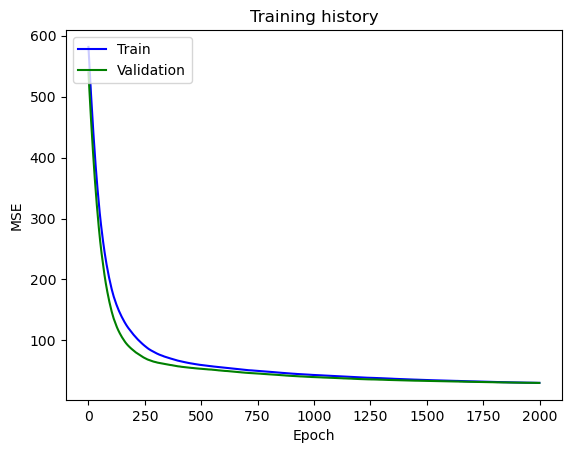

In [87]:
class myCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super(myCallback, self).__init__()
        self.best_mae = float('inf')
        
    def on_epoch_end(self, epoch, logs={}):
        current_mae = logs.get('loss')
        
        # Guardamos el mejor MAE
        if current_mae is not None and current_mae < self.best_mae:
            self.best_mae = current_mae
        
        # Imprimimos progreso cada 100 épocas
        if epoch % 100 == 0:
            print(f'\nÉpoca {epoch}:')
            print(f'MAE actual: {current_mae:.2f}')
            print(f'Mejor MAE hasta ahora: {self.best_mae:.2f}')
        
        # Condición de parada
        if current_mae is not None and current_mae < 2.0:
            print(f'\nÉpoca {epoch}: He alcanzado un MAE de {current_mae:.2f}, así que cancelo el entrenamiento!')
            self.model.stop_training = True

callbacks = myCallback()

modelo = Sequential()
modelo.add(Dense(1, input_shape=(n_vars,), activation="linear"))
modelo.compile(optimizer="adam", 
              loss="mae", 
              metrics=["mse"])

modelo.summary()

historico = modelo.fit(X_train, y_train, 
                      epochs=2000, 
                      batch_size=10, 
                      validation_split=0.2, 
                      callbacks=[callbacks],
                      verbose=0)

plt.plot(historico.history['mse'], c='b', label='Train')
plt.plot(historico.history['val_mse'], c='g', label='Validation')
plt.title('Training history')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()